## Importing Necessary Libraries

In [117]:
import warnings
warnings.simplefilter('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

pd.set_option('display.max_columns', None)#Setting Max Columns Display to Max inorder to get glance of all features in dataframe

In [ ]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Sometimes Missing Values are't in form of NaN
df = pd.read_csv('/Users/shilpanayak/Downloads/cardio_train.csv', delimiter = ';', na_values = missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

* id :> It's just the Id no of the row. Not revelant 
* age :> It's the age of a person in Days
* gender :> It's the gender of the person  
* height :> It's the height of the person in cm
* weight :> It's the weight of the person in kg
* ap_hi :> It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 120mmhg or Below
* ap_low :> It's the Diastolic blood pressure i.e. Pressure exerted when Blood exerts between arteries and heartbeats. Normal Value : 80mmhg or Below
* cholesterol :> It's the Cholestreol value (Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Boderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Boderline High
* gluc :> It's the Glucose Level. They're less than 100 mg/dL after not eating (fasting) for at least 8 hours. And they're less than 140 mg/dL 2 hours after eating. For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL
* smoke :> It contain Binary Values stating whether Person is a Smoker or not i.e.  {0 : 'Not a Smoker', 1 : 'Smoker'} 
* alco :> It contain Binary Values stating whether Person is an alchoalic or not i.e.  {0 : 'Not a Alchoalic', 1 : 'Alchoalic'} 
* active :> It contain Binary Values stating whether Person is involved in physical activites or not i.e.  {0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'} 
* cardio :> It's our Target Value Binary Values stating whether Person can have Cardiovascular diseases (CVDs) or Not i.e.  {0 : 'Not Have CVD', 1 : 'Have CVD'} 

>In our Data Analysis, We will try to analyze to find out the below stuffs :
* Missing / Duplicate Values 
* All the Continuous Values
* Distribution of the Numerical Values
* Categorial Values / Discrete Values
* Cardinality of Categorial Values / Discrete Values


## Missing / Duplicate Values

In [119]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [120]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Since we have total datapoints as 70000, we can even conclude from above data that we have no Null Values

We doesn't require column name 'id'. Better to remove it

In [122]:
df.drop(columns=['id'], inplace=True)

In [123]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


Guess we have some duplicate rows. Let's have a small lookup over duplicated rows

In [124]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10494  16937       2     170    70.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
1142   17493       2     169    74.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80            1     1      0   
32683  17535       2     165    65.0    120     80            1     1      0   

       alco  active  cardio  
10494     0       0       0  
44653     0       0       0  
1142      0       1       1  
50432     0       1       1  
32683     0       1       0

Duplicate Rows doesn't contribue to our prediction. Rather they just increase the training size. It's usual to get rid of duplicates from our dataset

In [125]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 69976 datapoints remaining with 12 features


## Continuous Values

Keeping a basic concept in my mind, if a column contains continuous values then it will have good quantity of Unique Values. <br>
Taking 25 as that threshold :
> df[feature].unique())>25

In [126]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>25]
print('Continuous Values are : {}'.format(Continuous_features))

Continuous Values are : ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


In [127]:
df[Continuous_features].head()

age  height  weight  ap_hi  ap_lo
0  18393     168    62.0    110     80
1  20228     156    85.0    140     90
2  18857     165    64.0    130     70
3  17623     169    82.0    150    100
4  17474     156    56.0    100     60

## Distribution of the Numerical Values

Before diving into distribution on the Continuous Variables, let's have some glance on basic stastical stuffs

In [128]:
df[Continuous_features].describe()

age        height        weight         ap_hi         ap_lo
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000
mean   19468.950126    164.359152     74.208519    128.820453     96.636261
std     2467.374620      8.211218     14.397211    154.037729    188.504581
min    10798.000000     55.000000     10.000000   -150.000000    -70.000000
25%    17664.000000    159.000000     65.000000    120.000000     80.000000
50%    19703.000000    165.000000     72.000000    120.000000     80.000000
75%    21327.000000    170.000000     82.000000    140.000000     90.000000
max    23713.000000    250.000000    200.000000  16020.000000  11000.000000

## Box Plot

In [129]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['height'], name = 'Height', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['weight'], name = 'Weight', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for Weight and Height with Outliers")
fig.show()

We can observe lot's of outliers ( Points below Lower Fence and Above Upper Fence ) <br>
To explain more about Outliers and result of this Box Plot, I'll use IQR Interquartile Range

## IQR Interquartile Range

<img  src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" alt="FDR" width="600" height="400"/>


Interquartile range gives another measure of variability. <br>
It equally divides the distribution into four equal parts called quartiles : 
>* First 25% is 1st quartile (Q1), i.e. 25 % of the data in the distribution will the less than Q1
>* Middle one is 2nd quartile (Q2) i.e. 50 % of the data in the distribution will the less than Q2
>* Last one is 3rd quartile (Q3) i.e. 75 % of the data in the distribution will the less than Q3

The interquartile range is the distance between the third and the first quartile i.e. :

> IQR = Q3- Q1

As a rule of thumb, observations can be qualified as outliers when they lie more than 1.5 IQR below the first quartile or 1.5 IQR above the third quartile. <br>
>Outliers = Q1 – 1.5 * IQR
<br>or<br>
>Outliers = Q3 + 1.5 * IQR

<img  src="https://i2.wp.com/makemeanalyst.com/wp-content/uploads/2017/05/IQR-1.png?resize=431%2C460" alt="FDR" width="600" height="400"/>



In [130]:

fig = make_subplots(rows=1, cols=2, subplot_titles=("Height Distribution", "Weight Distribution"))

trace0 = go.Histogram(x=df['height'], name = 'Height')
trace1 = go.Histogram(x=df['weight'], name = 'Weight')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Weight", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="Histograph", height=700)


fig.show()

Feel free to refer the concepts explained above to understand this distribution

In [131]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819


Well That's good quality of data that we'll gonna lose.
So, Rather than of using this problem Let's explore other techniques to hangle this problem

One way is Transforming variables. <br>
Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values

In [132]:
outline_free_df = df.copy()
outline_free_df[['height', 'weight']] = np.log(outline_free_df[['height', 'weight']])
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174


Without losing data we are able to reduce good amount of outliers. <br>
Now, We can define 0.005 and 0.995 Quantile range to handle the remaining outliers

In [133]:
outline_free_df = outline_free_df[(outline_free_df['weight'] > outline_free_df['weight'].quantile(0.005)) & (outline_free_df['weight'] < outline_free_df['weight'].quantile(0.995))]
outline_free_df = outline_free_df[(outline_free_df['height'] > outline_free_df['height'].quantile(0.005)) & (outline_free_df['height'] < outline_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


In [134]:
print('Handling outliners cost us {} datapoints'.format(len(df)-len(outline_free_df)))

Handling outliners cost us 1630 datapoints


In [135]:
outline_free_df = outline_free_df[outline_free_df['ap_lo']>=0]
outline_free_df = outline_free_df[outline_free_df['ap_hi']>=0]

As we researched, Substracting Diastolic blood pressure from Systolic blood pressure gives Pulse Pressure that can't be negative <br>
Therefore, ap_hi > ap_lo

In [136]:
print('There are total {} observations where ap_hi < ap_lo'.format(len(outline_free_df[outline_free_df['ap_hi'] < outline_free_df['ap_lo']])))

There are total 1182 observations where ap_hi < ap_lo


In [137]:
cleaned_data = outline_free_df[outline_free_df['ap_hi'] >= outline_free_df['ap_lo']].reset_index(drop=True)
print('Total observations preserved : {}'.format(len(cleaned_data)))

Total observations preserved : 67156


Highest pressure recorded in an individual was 370/360.<br>

<img  src="https://pbs.twimg.com/media/DOkphshW4AA-PuQ?format=jpg&name=medium" alt="FDR" width="600" height="400"/>

Its safe to assume some threshold let say, 250 and 200 for ap_hi and ap_lo respectively as upperbound. <br>
Values after that will be dropped as outliers

In [138]:
print('As per our assumptions we have total {} outliers'.format(len(cleaned_data[(cleaned_data["ap_hi"]>250) | (cleaned_data["ap_lo"]>200)])))

As per our assumptions we have total 38 outliers


In [139]:
cleaned_data = cleaned_data[(cleaned_data["ap_hi"]<=250) & (cleaned_data["ap_lo"]<=200)]

In [140]:
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], cleaned_data.shape[1]))

Total 67118 datapoints remaining with 12 features


We have Age in Days. Let's do some wrangling and and Age of person in Years

In [141]:
cleaned_data.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2  5.123964  4.127134    110     80            1     1      0   
1  20228       1  5.049856  4.442651    140     90            3     1      0   
2  18857       1  5.105945  4.158883    130     70            3     1      0   
3  17623       2  5.129899  4.406719    150    100            1     1      0   
4  17474       1  5.049856  4.025352    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [142]:
cleaned_data['age'] = cleaned_data['age'].div(365).apply(lambda x: int(x))

In [143]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=cleaned_data['age'], name = 'Age'))
fig.show()

>* Most of the people in dataset belongs to 49 to 60 age group. (We haven't round off the age i.e. One won't complete his current age unless his birthday arives ( if it makes sense )  
>* We have an outlier with age as 29 (smallest value) but let's ignore it.
>* Maximun age in our Dataset is 64

We just converted age from days to year. <br>
Let's make sure we didn't created any duplicacy 

In [144]:
duplicate_sum = cleaned_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 3180


In [145]:
duplicated = cleaned_data[cleaned_data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  \
22272   57       2  5.192957  4.605170    120     80            1     1   
58984   57       2  5.192957  4.605170    120     80            1     1   
9953    40       2  5.192957  4.382027    120     80            1     1   
20350   56       2  5.192957  4.382027    150     90            1     1   
28371   56       2  5.192957  4.382027    150     90            1     1   

       smoke  alco  active  cardio  
22272      0     0       1       0  
58984      0     0       1       0  
9953       0     0       1       0  
20350      0     0       1       1  
28371      0     0       1       1

Options: 
> * Keeping Age in Days
> * Dropping Duplicate rows (keeping age in year)

Inorder to build a generalized predictive model, it's better drop these rows. <br>
Slight change in days of a person's age should not be taken into consideration for determing CVD, provided we have other features that we'll be far valueable than this.

In [146]:
cleaned_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], df.shape[1]))

Total 63938 datapoints remaining with 12 features


| Preprocessing    |      Total Datapoints      |  Datapoints Lost |
|----------|:-------------:|------:|
| Duplicates Removed |  69976 | 24  |
| Outliner Removed |  68346 | 1630  |
| Negative Values Removed |    68338   |   8 |
| ap_hi < ap_lo Removed | 67156 |    1182 |
| Removed via Threshold  | 67118 |    38 |
| Duplicates Removed (Age - Days :> Year)  | 63938 |    3180 |
    

In [147]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Age groups grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [148]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [149]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

* From Pie charts it's clear that no age group dominates Non CVD or CVD portion i.e. Age groups are uniformly distributed
* But if you examine bar graph carefully, you get an interesting pattern:
> * People with low age groups have lower chance of having CVD
> * After reaching a peak point which is in this case is age group of 53 plot shows a delince shape for Non CVD and Increasing cases of CVD
> * This clearly shows People with higher age groups have more chance of having CVD

In [150]:

fig = make_subplots(rows=2, cols=2, subplot_titles=("Height Distribution for CVD Population", "Height Distribution for non CVD Population", "Weight Distribution for CVD Population", "Weight Distribution for non CVD Population"))

trace0 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 0]['height']), name = 'Non CVD')
trace1 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 1]['height']), name = 'CVD')

trace2 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 0]['weight']), name = 'Non CVD')
trace3 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 1]['weight']), name = 'CVD')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Height", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_xaxes(title_text="Weight", row=2, col=1)
fig.update_yaxes(title_text="Total Count", row=2, col=1)

fig.update_xaxes(title_text="Weight", row=2, col=2)
fig.update_yaxes(title_text="Total Count", row=2, col=2)

fig.show()

Features like Weight and Height are well distribuited for Non - CVD and CVD Population <br>
Nothing much for takeaway

In [151]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Systolic blood pressure Values grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Systolic Blood Pressure Values',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [152]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [153]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

By looking over the graph, We can conclude that :
> * Our Population has highest no of people having 120 mmHg Systolic Blood Pressure 
> * If a person is not having CVD, then There's more likely (48.7 %) that he / she has 120 mmHg Systolic Blood Pressure 
> * In case of CVD, We can't claim such strong assumption since no Pressure value is dominating the destribution 

In [154]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Diastolic blood pressure Values grouped by Target Value", 
        yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Diastolic Blood Pressure Values',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [155]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().values)])
fig.update_layout(title_text="Distribution of Daistolic blood pressure values for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [156]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().values)])
fig.update_layout(title_text="Distribution of Daistolic blood pressure values for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

By looking over the graph, We can conclude that :

> * Our Population has highest no of people having 80 mmHg Daistolic Blood Pressure
> * If a person is not having CVD, then There's more likely (55.3 %) that he / she has 120 mmHg Daistolic Blood Pressure  
> * If a person is having CVD, then There's more likely (42.5 %) that he / she has 120 mmHg Systolic Blood Pressure with second mostly likely case (31.9 %) of having 90mmHg Daistolic Blood Pressure 

## Categorial Values

In [157]:
Categorial_features = [feature for feature in cleaned_data.columns if len(cleaned_data[feature].unique())<25]
print('Categorial Values are : {}'.format(Categorial_features))

Categorial Values are : ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [158]:
for each_feature in Categorial_features:
    print('No of Categorial Values in Feature {} is {} as {}'.format(each_feature, len(cleaned_data[each_feature].unique()), cleaned_data[each_feature].unique()))

No of Categorial Values in Feature gender is 2 as [2 1]
No of Categorial Values in Feature cholesterol is 3 as [1 3 2]
No of Categorial Values in Feature gluc is 3 as [1 2 3]
No of Categorial Values in Feature smoke is 2 as [0 1]
No of Categorial Values in Feature alco is 2 as [0 1]
No of Categorial Values in Feature active is 2 as [1 0]
No of Categorial Values in Feature cardio is 2 as [0 1]


After going through the description provided by the Distributer, Following information is gathered :
>* gender has 2 categorial values as { 1 : Women, 2 : Male } 
>* cholesterol has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
>* gluc has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
>* Remaining Categories are just binary values

Let's check counts of features in different relations

In [159]:
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=cleaned_data['cardio'].value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

Clearly it's a balanced dataset

In [160]:

fig = make_subplots(rows=2, cols=3,subplot_titles=("Alchoal Distribution", "Gender Distribution", "Choslesterol Distribution", "Glucose Distribution", "Smoking Distribution", "Fitness Distribution"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Non Alchoalic', 'Alchoalic'],values=cleaned_data['alco'].value_counts().values, name = 'Alchoal Status'), 1, 1)
fig.add_trace(go.Pie(labels=['Female', 'Male'],values=cleaned_data['gender'].value_counts().values, name = 'Gender Status'), 1, 2)

fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values=cleaned_data['cholesterol'].value_counts().values, name = 'Cholesterol Level Status'), 1, 3)
fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values=cleaned_data['gluc'].value_counts().values, name = 'Glucose Level Status'), 2, 1)

fig.add_trace(go.Pie(labels=['Non Smoker', 'Smoker'],values=cleaned_data['smoke'].value_counts().values, name = 'Smoking Status'), 2, 2)
fig.add_trace(go.Pie(labels=['Not Involved in Physical Activites', 'Involved in Physical Activites'],values=cleaned_data['active'].value_counts().values, name = 'Fitness Status'), 2, 3)

fig.update_traces(hole=.4,)
fig.update_layout(title_text="Distribution of Various Categorial Values")

fig.show()


Categorial Values are some kind of biased towards a particular value. I don't think we'll get some usefull insights from ploting their distribution in CVD and Non CVD <br>
Feel free to have a close look on the chart to get better insights of distrubution of Categorial Features

##  New features 


We all whenever we have height and weight, we can calculate BMI. It seems better to get another Feature BMI.
<img  src="https://secretsofhealthyeating.com/wp-content/uploads/2018/09/BMI-Formula-768x377.jpg" alt="FDR" width="600" height="400"/>


But don't forget we have converted our weight and height via natural log function to reduce outliers <br>
In order to calculate BMI, We'll calculate inverse of log and then we'll apply the formula of BMI <br>
> The inverse of log is exp

In [161]:
def BMI(data):
    return np.exp(data['weight']) / (np.exp(data['height'])/100)**2 
 
cleaned_data['bmi'] = cleaned_data.apply(BMI, axis=1)

Similarly There's a relation bewteen Systolic Diastolic blood pressure that derives pulse rate

In [162]:
def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])
 
cleaned_data['pulse'] = cleaned_data.apply(pulse, axis=1)

## Feature Selection

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. <br>
So, We do feature selection ( automatically or manually ) to select good data

<img  src="https://miro.medium.com/max/694/0*gz5XuPZfN0wAi66I" alt="FDR" width="600" height="400"/>

We have various techniques for feature selection. Here ill stuck to more tradational way i.e. using correlational matrix

Now we have some new feature, let's build up a heat map to get to know about correlation between variables

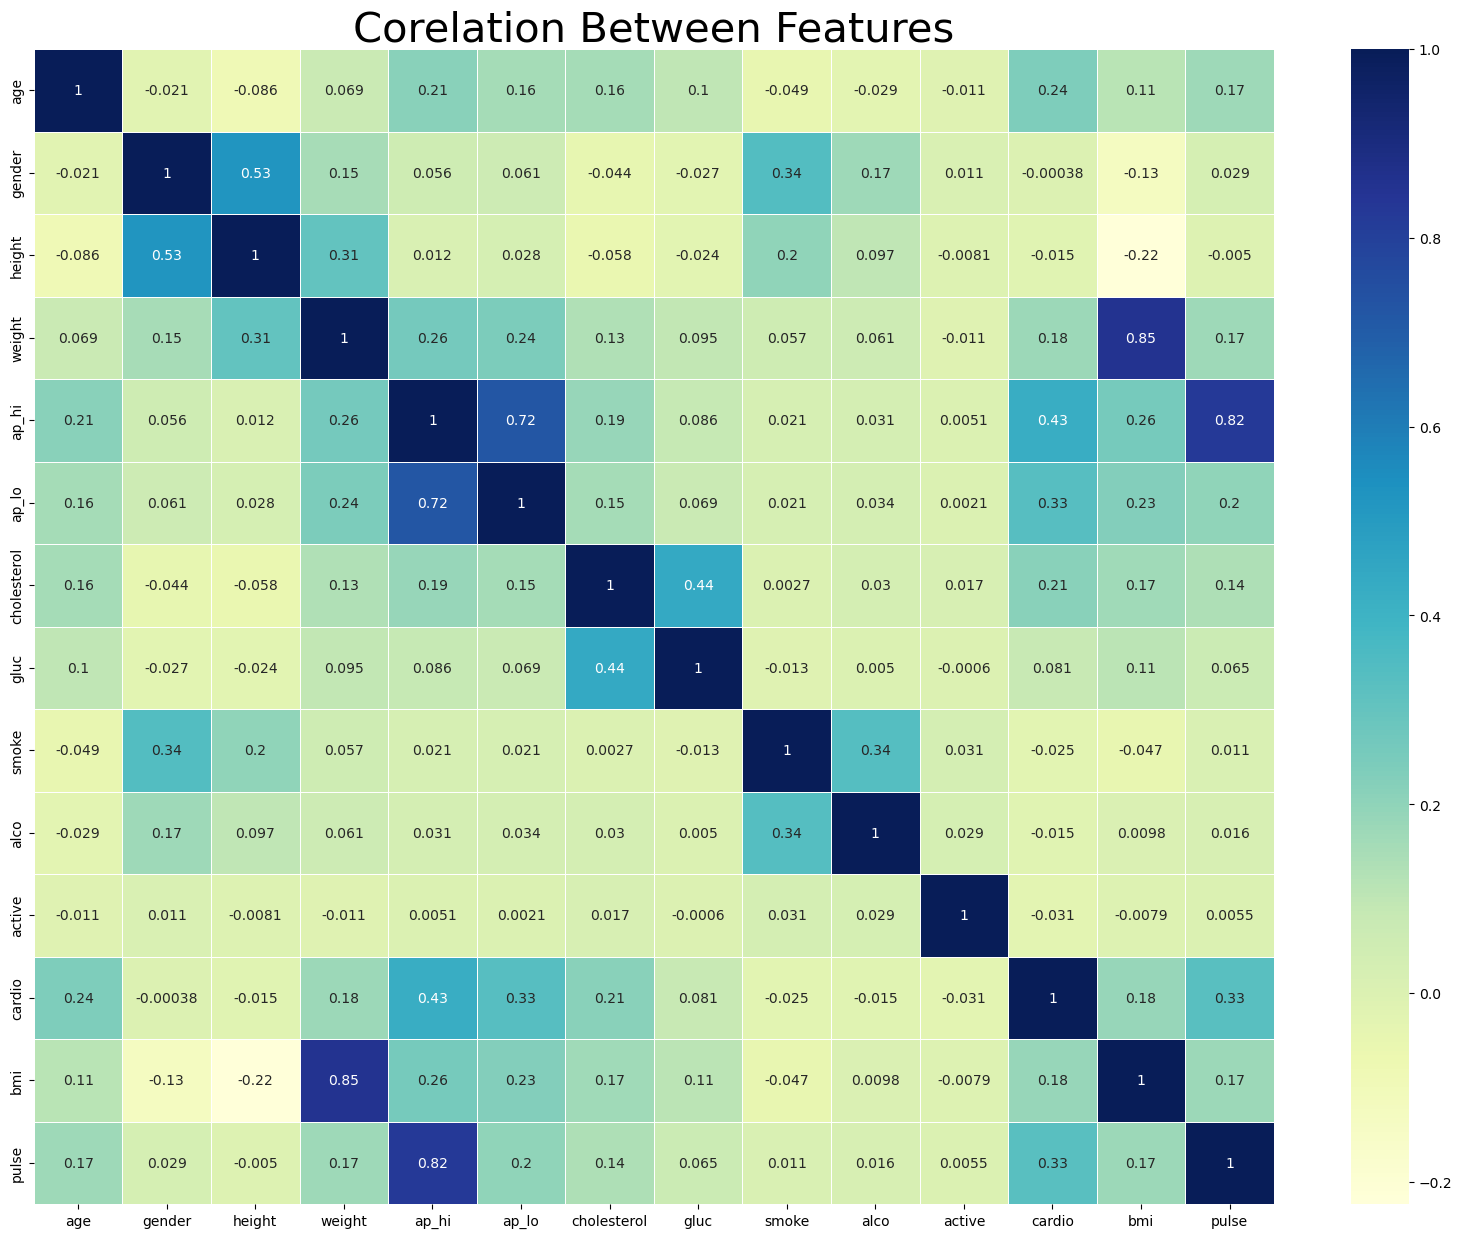

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(cleaned_data.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

| Features with Strong Correlation with Target Value  |      Correlation with Target Value      |  Strong Correlation with another feature |
|----------|:-------------:|------:|
| age |    0.24   |   ap_hi ( 0.21 ) |
| ap_hi |  0.43 | pulse ( 0.82 ) ap_lo ( 0.72 ) weight ( 0.26 ) age ( 0.21 )|
| ap_lo |  0.33 | ap_hi ( 0.72 ) bmi ( 0.23 ) weight ( 0.24 )|
| cholesterol | 0.21 |    gluc ( 0.44 ) |
| pulse  | 0.33 |    ap_hi ( 0.82 ) |

Basically, you would like to have features with good amount of correlation with target feature and low correlation with any independent feature <br>
In simple words, high correlation within independent features means both wanna represent same thing and even if you drop one of the feature, you won't lose much quality data 

>* ap_hi has the correlated with quite features but since it has the maximum correlation with Target Value, We can't afford to ignore it <br>
>* Similar case is with pulse and ap_lo

>* Unfortunately our newly formed feature 'bmi' doesn't have good correlation with target + corelates with ap_lo
>* Similar case is with weight

>* 'gender' is the least correlated feature + adding correlation with smoke and height 

>* Features like height, smoke, alco, active have quite low amount of correlation with target feature

Preserving Good data, We'll gonna drop 'bmi',  'weight',  'gluc',  'gender',  'height',  'smoke',  'alco',  'active'

In [164]:
cleaned_data
#X = cleaned_data.drop(['cardio', 'bmi', 'weight', 'gluc', 'gender', 'smoke', 'alco', 'active'], axis =1)
Y = cleaned_data['cardio']

X = cleaned_data[['age','ap_hi', 'ap_lo', 'cholesterol', 'pulse']]
#Z = cleaned_data[['age','ap_hi', 'ap_lo', 'cholesterol', 'pulse', 'cardio']]


X.head(5)

age  ap_hi  ap_lo  cholesterol  pulse
0   50    110     80            1   30.0
1   55    140     90            3   50.0
2   51    130     70            3   60.0
3   48    150    100            1   50.0
4   47    100     60            1   40.0

In [165]:
#LogisticRegression

from sklearn.model_selection import train_test_split

scaler = StandardScaler()
standard_X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(standard_X, Y, test_size=0.3, random_state=42)

# Step 3: Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.717704097591492
Precision: 0.7201577572634731
Recall: 0.717704097591492
F1 score: 0.7172164088843658


After going through the description provided by the Distributer, Following information is gathered :
>* gender has 2 categorial values as { 1 : Women, 2 : Male } 
>* cholesterol has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
>* gluc has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
>* Remaining Categories are just binary values

No of Categorial Values in Feature gender is 2 as [2 1]


No of Categorial Values in Feature cholesterol is 3 as [1 3 2]


No of Categorial Values in Feature gluc is 3 as [1 2 3]


No of Categorial Values in Feature smoke is 2 as [0 1]


No of Categorial Values in Feature alco is 2 as [0 1]


No of Categorial Values in Feature active is 2 as [1 0]


No of Categorial Values in Feature cardio is 2 as [0 1]

In [166]:
#X = cleaned_data[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'pulse']]
new_individual = [['48','106','90', '1','33']]
prediction = model.predict(new_individual)
print('Prediction:', prediction)

Prediction: [1]


In [167]:
#Simple Neural Networks

# Import necessary libraries
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
Y = cleaned_data['cardio']
X = cleaned_data[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'pulse']]
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(standard_X, Y, test_size=0.3, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on new data
new_individual = [[48, 106, 90, 1, 33]]
prediction = model.predict(scaler.transform(new_individual))
print('Prediction:', prediction)


Epoch 1/10
1399/1399 [==============================] - 10s 5ms/step - loss: 0.5573 - accuracy: 0.7248 - val_loss: 0.5595 - val_accuracy: 0.7211
Epoch 2/10
1399/1399 [==============================] - 6s 4ms/step - loss: 0.5517 - accuracy: 0.7277 - val_loss: 0.5578 - val_accuracy: 0.7230
Epoch 3/10
1399/1399 [==============================] - 5s 4ms/step - loss: 0.5507 - accuracy: 0.7295 - val_loss: 0.5580 - val_accuracy: 0.7195
Epoch 4/10
1399/1399 [==============================] - 6s 4ms/step - loss: 0.5498 - accuracy: 0.7290 - val_loss: 0.5589 - val_accuracy: 0.7195
Epoch 5/10
1399/1399 [==============================] - 5s 4ms/step - loss: 0.5492 - accuracy: 0.7289 - val_loss: 0.5569 - val_accuracy: 0.7236
Epoch 6/10
1399/1399 [==============================] - 7s 5ms/step - loss: 0.5487 - accuracy: 0.7293 - val_loss: 0.5583 - val_accuracy: 0.7229
Epoch 7/10
1399/1399 [==============================] - 8s 6ms/step - loss: 0.5485 - accuracy: 0.7288 - val_loss: 0.5563 - val_accuracy

In [171]:
#Random forest

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk

# Prepare the data
Y = cleaned_data['cardio']
X = cleaned_data[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'pulse']]
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(standard_X, Y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Make predictions on new data
new_individual = [[48, 106, 90, 1, 33]]
prediction = model.predict(scaler.transform(new_individual))
print('Prediction:', prediction)

Accuracy: 0.7217704097591492
Precision: 0.7247386113219881
Recall: 0.7224842169365816
F1 score: 0.721234559864683
Prediction: [0]


In [172]:
#Commandline chatbot

# Define a function to preprocess user input text
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    return ' '.join(words)

# Get user input
#user_input = input("Enter patient's age, systolic blood pressure, diastolic blood pressure, cholesterol level, and pulse rate, separated by commas: ")

# Print instructions for the user
print("Please enter the patient's age, systolic blood pressure, diastolic blood pressure, cholesterol level, and pulse rate, separated by commas.")

# Get user input
user_input = input("Input: ")

# Preprocess user input
user_input_processed = preprocess_text(user_input)

# Extract features from user input
age, ap_hi, ap_lo, cholesterol, pulse = user_input_processed.split(',')
new_individual = [[float(age), float(ap_hi), float(ap_lo), float(cholesterol), float(pulse)]]

# Make prediction using the trained model
prediction = model.predict(scaler.transform(new_individual))

print('Predicted value is:', prediction)

if prediction[0] == 1:
    print("The individual is predicted to have a Cardio vascular issue.")
else:
    print("The individual is predicted to not have a Cardio vascular issue.")

Please enter the patient's age, systolic blood pressure, diastolic blood pressure, cholesterol level, and pulse rate, separated by commas.
Predicted value is: [1]
The individual is predicted to have a Cardio vascular issue.
